In [ ]:
'''
this script run the k-mean to fit in 6 clusters.
i) the normed sentiment arcs with 100 dimentiona movies is found in '../data/normed_sentiment_with_genome/'.
------
the progression to combine:
1) run the k-means and give diffrent name,colors of clusters.
2) split the movies by the cluaters and separetely saved in the '../data/k_means_result/'
3) draw the emotional arcs of each movie and seperated them as clusters they belong.
4) used the t-Sne to transfer the 100-dimentionaal emotionals arc to 2-dimentinoal for visualizing on the plane.
------
'''

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import manifold
from sklearn.metrics import euclidean_distances
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pickle
from collections import defaultdict

In [3]:
def load_normed_sentiment(path_to_load):
    file_names=list(set(os.listdir(path_to_load)))
    sentiment_matrix=[]
    index_filename_dict={}
    movie_name2_sentiment_index={}
    index=0
    for file_name in file_names:
        if file_name!='.DS_Store':
            sentiment=pd.read_csv(path_to_load+file_name).values
            sentiment=sentiment.ravel()
            sentiment_matrix.append(sentiment)
            index_filename_dict[index]=file_name
            movie_name2_sentiment_index[file_name[:-4]]=index
            index+=1
    return sentiment_matrix,index_filename_dict,movie_name2_sentiment_index

In [4]:
def ClusterIndices_group(clustNum, labels_array): #list comprehension
    return np.array([i for i, x in enumerate(labels_array) if x == clustNum])

In [5]:
def K_means_for_normed_sentiment(sentiment_matrix,cluster_number):

    X=np.array(sentiment_matrix)
    kmeans = KMeans(n_clusters=cluster_number, random_state=0).fit(X)
    clustered_full_sentiment_maxtrix=[]
    cluslter_index_list=[]
    for num in range(cluster_number):
        cluslter_index=ClusterIndices_group(num,kmeans.labels_)
        cluslter_index_list.append(cluslter_index)
        cluster_sentiment_maxtrix= [sentiment_matrix[i] for i in cluslter_index]
        clustered_full_sentiment_maxtrix.append(cluster_sentiment_maxtrix)
    return cluslter_index_list,clustered_full_sentiment_maxtrix,kmeans.cluster_centers_

In [6]:
def draw_clusters(clustered_full_sentiment_maxtrix,kmeans_cluster_centers):
    cluster_num=len(kmeans_cluster_centers)
    fig,ax=plt.subplots(cluster_num,figsize=(5,20))
    fig.tight_layout()
    for i in range(cluster_num):
        cluster_sentiment_matrix=clustered_full_sentiment_maxtrix[i]
        print len(cluster_sentiment_matrix)
        for file_sentiment in cluster_sentiment_matrix:
                file_sentiment=np.asarray(file_sentiment).ravel()
                ax[i].plot(file_sentiment,color='lightgrey',linewidth=0.2)
        ax[i].plot(kmeans_cluster_centers[i],color='orangered')
        ax[i].set_xlabel('time')
        ax[i].set_ylabel('sentiment')
    if not os.path.exists('../data/k_means_result'):
        os.mkdir('../data/k_means_result')
    plt.savefig('../data/k_means_result/k_means_sentiment.png', dpi=300)
    plt.show()
    



In [7]:
def save_k_group_movie_names(index_filename_dict,cluslter_index_list):
    num=1
    np.save('../data/k_means_result/movie_name_array',index_filename_dict.values())
    for cluslter_index in cluslter_index_list:
        movie_name_cluster=[]
        for one_index_movie in cluslter_index:
            movie_name_cluster.append(index_filename_dict.get(one_index_movie))
        np.save('../data/k_means_result/movie_name_cluster/'+str(num),movie_name_cluster)
        #with open('../data/k_means_result/movie_name_cluster_'+str(num)+'.txt', 'w') as filehandle:  
         #   filehandle.write('%s\n' % movie_name_cluster) 
        num+=1

In [9]:
def create_d2_sentiment(sentiment_matrix):
    X = sentiment_matrix
    tsne = TSNE(n_components=2)
    tsne.fit_transform(X)
    return tsne.embedding_
def create_custered_d2_sentiment(sentiment_matrix,cluster_num,index_filename_dict): 
    d2_sentiment=create_d2_sentiment(sentiment_matrix)
    clustered_d2_sentiment=[]
    colors=['255,31,31,0.900000','28,217,44,0.900000','37,171,226,0.900000','222,222,222,0.900000']
    colors2=['#b19391','#939790','#faf8e9','#605a68','#24222f','#737824']
    colors3=['red','orange','green','pink','blue','black']
    colors4=['#b2182b','#ef8a62','#fddbc7','#ffffff','#e0e0e0','#999999']
    select=[]
    with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/title2id.pkl','rb') as f:
        t=pickle.load(f)
    for lable in range(cluster_num):
        for i in cluslter_index_list[lable]:
            select.append(index_filename_dict.get(i))
            var=[t.get(index_filename_dict.get(i)[:-4])['id']]+[index_filename_dict.get(i)[:-4]]+['group'+str(lable)]+[colors4[lable]]+d2_sentiment[i][:2].tolist()
            clustered_d2_sentiment.append(var)
    pd.DataFrame(clustered_d2_sentiment,columns=['movieId','name','group','color','x','y']).sort_values(by='movieId')\
.to_csv("/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/d2_sentiment.csv",index=False)
    #return clustered_d2_sentiment

614
748
657
489
563
696


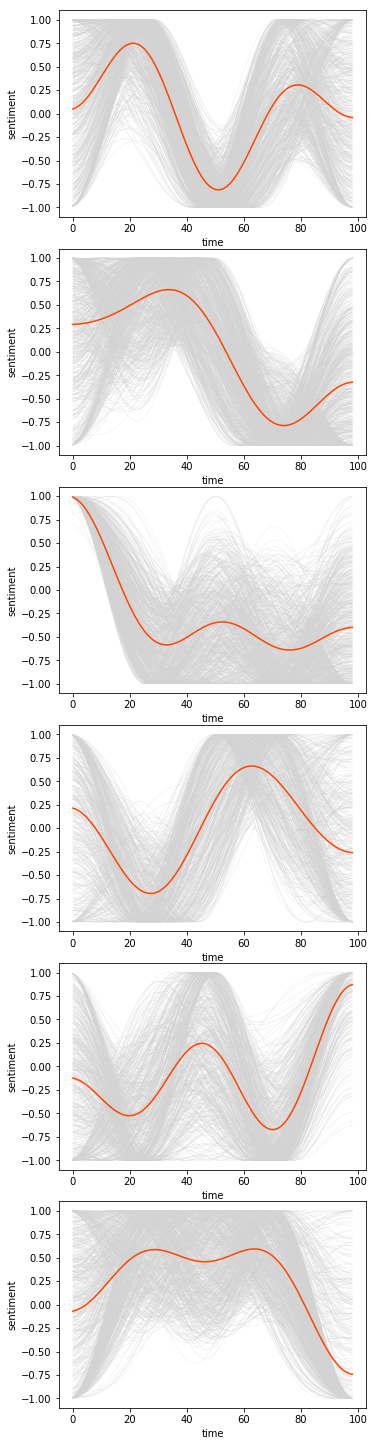

In [10]:
if __name__ == "__main__":
    path_to_load='../data/normed_sentiment_with_genome/'
    cluster_num=6
    sentiment_matrix,index_filename_dict,movie_name2_sentiment_index=load_normed_sentiment(path_to_load)
    cluslter_index_list,clustered_full_sentiment_maxtrix,kmeans_cluster_centers=K_means_for_normed_sentiment(sentiment_matrix,cluster_num)
    draw_clusters(clustered_full_sentiment_maxtrix,kmeans_cluster_centers)
    save_k_group_movie_names(index_filename_dict,cluslter_index_list)
    create_custered_d2_sentiment(sentiment_matrix,cluster_num,index_filename_dict) 
    pd.DataFrame(sentiment_matrix).to_csv("/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/sentiment_line.csv")
    pd.DataFrame(sentiment_matrix).to_csv("../data/sentiment_line_for_c2.csv")
    with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/movie_name2sentiment_sim_index.pkl','wb') as f:
        pickle.dump(movie_name2_sentiment_index, f, pickle.HIGHEST_PROTOCOL)

In [15]:
d2_sentiment=create_d2_sentiment(sentiment_matrix)

In [20]:
colors6=['#b2182b','#ef8a62','#fddbc7','#e0e0e0','#999999','#4d4d4d']
colors5=['#c51b7d','#e9a3c9','#fde0ef','#e6f5d0','#a1d76a','#4d9221']
select=[]
clustered_d2_sentiment=[]
with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/title2id.pkl','rb') as f:
        t=pickle.load(f)
for lable in range(cluster_num):
        for i in cluslter_index_list[lable]:
            select.append(index_filename_dict.get(i))
            var=[t.get(index_filename_dict.get(i)[:-4])['id']]+[index_filename_dict.get(i)[:-4]]+['group'+str(lable)]+[colors6[lable]]+d2_sentiment[i][:2].tolist()
            clustered_d2_sentiment.append(var)
pd.DataFrame(clustered_d2_sentiment,columns=['movieId','name','group','color','x','y']).sort_values(by='movieId')\
.to_csv("/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/d2_sentiment.csv",index=False)
    #return clustered_d2_sentiment

In [32]:
import os
path_to_load='../data/'

In [35]:
pd.read_csv(path_to_load+'movie_with_youtubeId.txt').to_csv(path_to_load+'movie_with_youtubeId.csv')

In [11]:
with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/title2id.pkl','rb') as f:
        t=pickle.load(f)
len(t)

7916

In [34]:
def write_sentiment_matrix(sentiment_matrix,dir_path):
    with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/title2id.pkl','rb') as f:
        t=pickle.load(f)
    id_list=[]
    for i in range(len(sentiment_matrix)):
        id_list.append(t.get(index_filename_dict.get(i)[:-4])['id'])
    line=pd.DataFrame(sentiment_matrix)
    line['id']=id_list
    line.to_csv(dir_path+"sentiment_line.csv",index=False)


In [36]:
write_sentiment_matrix(sentiment_matrix,'/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/')

In [ ]:
write_sentiment_matrix(sentiment_matrix,index,'../data/')

In [ ]:
def write_sentiment_line(sentiment_matrix,index):
    sentiment_line=defaultdict(list)
    for i in range(len(sentiment_matrix.shape[0])):
    id=index[i]
    for j in range(99):
        sentiment_line[id].append({'index': j,'point':sentiment_matrix[i][j]})

In [ ]:
with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/sentiment_line.pkl','wb') as f:
        pickle.dump(sentiment_line, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/sentiment_line.pkl','rb') as f:
     a=pickle.load(f)

In [31]:
with open('/Users/yangyangwang/PycharmProjects/movie_project/app/static/mood/movie_name2_emotion_sim_index.pkl','wb') as f:
        pickle.dump(movie_name2_index, f, pickle.HIGHEST_PROTOCOL)

In [60]:
t=[i[:-4] for i in index_filename_dict.values()]

In [49]:
movie=pd.read_csv('../movielens/ml-latest/select-movies.csv')
